### Importamos librerias.

In [1]:
from nltk.stem import SnowballStemmer 
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

### Importamos datos del perfil de <i>LinkedIn</i>

In [14]:
f = open ('perfil.txt','r')
raw = f.read().lower().replace('.',',').replace('!',',')

### Tokenizamos y eliminamos StopWords.

In [15]:
Tokens_List = sent_tokenize(raw, 'spanish')
Stemmer_List = SnowballStemmer('spanish')
Punct_List = dict((ord(punct), None) for punct in string.punctuation + '¿¡►■')
    
def TxNormalize(text):
    tokens = word_tokenize(text.lower().translate(Punct_List))
    return [x for x in tokens if x not in stopwords.words('spanish')]
    
for i in Tokens_List:
    dat = TxNormalize(i)
    
df = pd.DataFrame(dat, columns =['word'])
df = df.sample(frac = 1
              , random_state = 12345)
df.head()

,word
316,big
253,compromiso
332,siempre
286,múltiples
73,control


### Creamos nube de palabras.

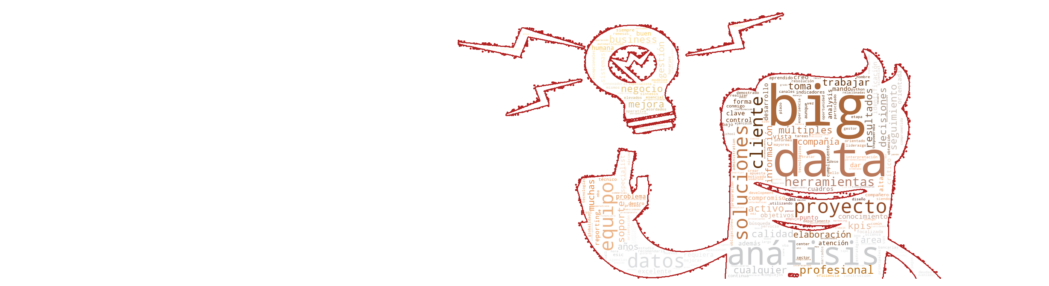

In [16]:
text = " ".join(review for review in df.word)
mask = np.array(Image.open('image.jpg'))

sw = set(STOPWORDS)
sw.update(['gran','jesús','capacidad','ser','trabajo','persona','allá','analítica'])
colors = ImageColorGenerator(mask)

wc = WordCloud(stopwords=sw
               , background_color='white'
               , max_words = 1000
               , mask=mask
               , contour_width = 3
               , contour_color = 'firebrick')

wc.generate(text)
plt.figure(figsize = [20, 5])
plt.imshow(wc.recolor(color_func = colors)
           , interpolation='bilinear')
plt.axis('off')
plt.savefig('Data Science.png')
plt.show()
plt.close()